# Neural networks

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import torch
import os
%matplotlib inline

In [12]:
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hid1 = torch.nn.Linear(6, 10)  
    self.hid2 = torch.nn.Linear(10, 10)
    self.oupt = torch.nn.Linear(10, 1)
    torch.nn.init.xavier_uniform_(self.hid1.weight) 
    torch.nn.init.zeros_(self.hid1.bias)
    torch.nn.init.xavier_uniform_(self.hid2.weight)
    torch.nn.init.zeros_(self.hid2.bias)
    torch.nn.init.xavier_uniform_(self.oupt.weight)
    torch.nn.init.zeros_(self.oupt.bias)
    
  def forward(self, x):
    z = torch.tanh(self.hid1(x))
    z = torch.tanh(self.hid2(z))
    z = self.oupt(z) 
    return z

In [13]:
def normalise(dataarray):
  dataarraynormalise = np.zeros_like(dataarray)
  for j,column in enumerate(dataarray.T):
    minvalue = np.min(column)
    maxvalue = np.max(column)
    print('min',minvalue,'max',maxvalue)
    dataarraynormalise[:,j] = np.divide(np.subtract(dataarray[:,j],minvalue),maxvalue - minvalue)
  return(dataarraynormalise)

In [14]:
def plot(x,y):
  plt.scatter(x, y, color='black',s=1)
  plt.xlabel("actual")
  plt.ylabel("predicted")
  print("R^2: " + str(r2_score(x, y)))
  plt.show()

In [15]:
def loaddata(filename):
  train_file = np.loadtxt(filename, delimiter = ",",skiprows = 1)
  test_file = np.loadtxt(filename, delimiter = ",",skiprows = 1)
  print("Loading  data into memory ")
  train_x = np.array([])
  train_y = np.array([])
  columns_train_x = [0,1,2,3,4,5]
  columns_train_y = [6]
  test_x = np.array(test_file[:,columns_train_x])
  test_y = np.array(test_file[:,columns_train_y])
  train_x = np.array(train_file[:,columns_train_x])
  train_y = np.array(train_file[:,columns_train_y])
  return(train_x,train_y,test_x,test_y)

In [16]:
torch.manual_seed(1);  np.random.seed(1)

train_x,train_y,test_x,test_y = loaddata('data/exampledatasetNN.csv')
train_x = normalise(train_x)

Loading  data into memory 
min 0.000152832013555 max 0.996181629481725
min 0.000683755031787 max 0.998893090407364
min 0.00387017976027 max 0.998871911433525
min 3.90704954043031e-05 max 0.99723221489694
min 0.003452573320828 max 0.99596445763018
min 0.015261088847183 max 0.997876338311471


In [17]:
net = Net() 
net = net.train()  
bat_size = 50
loss_func = torch.nn.MSELoss()  # mean squared error
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [18]:
n_items = len(train_x)
batches_per_epoch = n_items // bat_size
max_batches = 1000 * batches_per_epoch

print("Starting training")
for b in range(max_batches):
    curr_bat = np.random.choice(n_items, bat_size,
      replace=False)
    X = torch.Tensor(train_x[curr_bat])
    Y = torch.Tensor(train_y[curr_bat]).view(bat_size,1)
    optimizer.zero_grad()
    oupt = net(X)
    loss_obj = loss_func(oupt, Y)
    loss_obj.backward()
    optimizer.step()
    print(b,loss_obj)


Starting training
0 tensor(1.9501, grad_fn=<MseLossBackward>)
1 tensor(1.1011, grad_fn=<MseLossBackward>)
2 tensor(0.6509, grad_fn=<MseLossBackward>)
3 tensor(0.5339, grad_fn=<MseLossBackward>)
4 tensor(0.4225, grad_fn=<MseLossBackward>)
5 tensor(0.3086, grad_fn=<MseLossBackward>)
6 tensor(0.3663, grad_fn=<MseLossBackward>)
7 tensor(0.4934, grad_fn=<MseLossBackward>)
8 tensor(0.5318, grad_fn=<MseLossBackward>)
9 tensor(0.4294, grad_fn=<MseLossBackward>)
10 tensor(0.6318, grad_fn=<MseLossBackward>)
11 tensor(0.5528, grad_fn=<MseLossBackward>)
12 tensor(0.4967, grad_fn=<MseLossBackward>)
13 tensor(0.2826, grad_fn=<MseLossBackward>)
14 tensor(0.3306, grad_fn=<MseLossBackward>)
15 tensor(0.2141, grad_fn=<MseLossBackward>)
16 tensor(0.4486, grad_fn=<MseLossBackward>)
17 tensor(0.4254, grad_fn=<MseLossBackward>)
18 tensor(0.3868, grad_fn=<MseLossBackward>)
19 tensor(0.3392, grad_fn=<MseLossBackward>)
20 tensor(0.3950, grad_fn=<MseLossBackward>)
21 tensor(0.4355, grad_fn=<MseLossBackward>)
22

308 tensor(0.0469, grad_fn=<MseLossBackward>)
309 tensor(0.0716, grad_fn=<MseLossBackward>)
310 tensor(0.0700, grad_fn=<MseLossBackward>)
311 tensor(0.0535, grad_fn=<MseLossBackward>)
312 tensor(0.0869, grad_fn=<MseLossBackward>)
313 tensor(0.0781, grad_fn=<MseLossBackward>)
314 tensor(0.0503, grad_fn=<MseLossBackward>)
315 tensor(0.0783, grad_fn=<MseLossBackward>)
316 tensor(0.0589, grad_fn=<MseLossBackward>)
317 tensor(0.0552, grad_fn=<MseLossBackward>)
318 tensor(0.0494, grad_fn=<MseLossBackward>)
319 tensor(0.0632, grad_fn=<MseLossBackward>)
320 tensor(0.0625, grad_fn=<MseLossBackward>)
321 tensor(0.0504, grad_fn=<MseLossBackward>)
322 tensor(0.0452, grad_fn=<MseLossBackward>)
323 tensor(0.0567, grad_fn=<MseLossBackward>)
324 tensor(0.0702, grad_fn=<MseLossBackward>)
325 tensor(0.0504, grad_fn=<MseLossBackward>)
326 tensor(0.0669, grad_fn=<MseLossBackward>)
327 tensor(0.0718, grad_fn=<MseLossBackward>)
328 tensor(0.0733, grad_fn=<MseLossBackward>)
329 tensor(0.0527, grad_fn=<MseLos

613 tensor(0.0447, grad_fn=<MseLossBackward>)
614 tensor(0.0455, grad_fn=<MseLossBackward>)
615 tensor(0.0453, grad_fn=<MseLossBackward>)
616 tensor(0.0325, grad_fn=<MseLossBackward>)
617 tensor(0.0616, grad_fn=<MseLossBackward>)
618 tensor(0.0476, grad_fn=<MseLossBackward>)
619 tensor(0.0647, grad_fn=<MseLossBackward>)
620 tensor(0.0621, grad_fn=<MseLossBackward>)
621 tensor(0.0565, grad_fn=<MseLossBackward>)
622 tensor(0.0666, grad_fn=<MseLossBackward>)
623 tensor(0.0537, grad_fn=<MseLossBackward>)
624 tensor(0.0486, grad_fn=<MseLossBackward>)
625 tensor(0.0669, grad_fn=<MseLossBackward>)
626 tensor(0.0416, grad_fn=<MseLossBackward>)
627 tensor(0.0591, grad_fn=<MseLossBackward>)
628 tensor(0.0580, grad_fn=<MseLossBackward>)
629 tensor(0.0537, grad_fn=<MseLossBackward>)
630 tensor(0.0414, grad_fn=<MseLossBackward>)
631 tensor(0.0769, grad_fn=<MseLossBackward>)
632 tensor(0.0585, grad_fn=<MseLossBackward>)
633 tensor(0.0545, grad_fn=<MseLossBackward>)
634 tensor(0.0613, grad_fn=<MseLos

905 tensor(0.0399, grad_fn=<MseLossBackward>)
906 tensor(0.0428, grad_fn=<MseLossBackward>)
907 tensor(0.0474, grad_fn=<MseLossBackward>)
908 tensor(0.0334, grad_fn=<MseLossBackward>)
909 tensor(0.0503, grad_fn=<MseLossBackward>)
910 tensor(0.0302, grad_fn=<MseLossBackward>)
911 tensor(0.0412, grad_fn=<MseLossBackward>)
912 tensor(0.0411, grad_fn=<MseLossBackward>)
913 tensor(0.0437, grad_fn=<MseLossBackward>)
914 tensor(0.0536, grad_fn=<MseLossBackward>)
915 tensor(0.0472, grad_fn=<MseLossBackward>)
916 tensor(0.0301, grad_fn=<MseLossBackward>)
917 tensor(0.0358, grad_fn=<MseLossBackward>)
918 tensor(0.0349, grad_fn=<MseLossBackward>)
919 tensor(0.0406, grad_fn=<MseLossBackward>)
920 tensor(0.0409, grad_fn=<MseLossBackward>)
921 tensor(0.0303, grad_fn=<MseLossBackward>)
922 tensor(0.0342, grad_fn=<MseLossBackward>)
923 tensor(0.0477, grad_fn=<MseLossBackward>)
924 tensor(0.0468, grad_fn=<MseLossBackward>)
925 tensor(0.0445, grad_fn=<MseLossBackward>)
926 tensor(0.0380, grad_fn=<MseLos

1201 tensor(0.0311, grad_fn=<MseLossBackward>)
1202 tensor(0.0336, grad_fn=<MseLossBackward>)
1203 tensor(0.0294, grad_fn=<MseLossBackward>)
1204 tensor(0.0189, grad_fn=<MseLossBackward>)
1205 tensor(0.0231, grad_fn=<MseLossBackward>)
1206 tensor(0.0418, grad_fn=<MseLossBackward>)
1207 tensor(0.0286, grad_fn=<MseLossBackward>)
1208 tensor(0.0339, grad_fn=<MseLossBackward>)
1209 tensor(0.0478, grad_fn=<MseLossBackward>)
1210 tensor(0.0283, grad_fn=<MseLossBackward>)
1211 tensor(0.0268, grad_fn=<MseLossBackward>)
1212 tensor(0.0459, grad_fn=<MseLossBackward>)
1213 tensor(0.0387, grad_fn=<MseLossBackward>)
1214 tensor(0.0267, grad_fn=<MseLossBackward>)
1215 tensor(0.0424, grad_fn=<MseLossBackward>)
1216 tensor(0.0467, grad_fn=<MseLossBackward>)
1217 tensor(0.0402, grad_fn=<MseLossBackward>)
1218 tensor(0.0339, grad_fn=<MseLossBackward>)
1219 tensor(0.0311, grad_fn=<MseLossBackward>)
1220 tensor(0.0233, grad_fn=<MseLossBackward>)
1221 tensor(0.0304, grad_fn=<MseLossBackward>)
1222 tensor(0

1505 tensor(0.0215, grad_fn=<MseLossBackward>)
1506 tensor(0.0253, grad_fn=<MseLossBackward>)
1507 tensor(0.0181, grad_fn=<MseLossBackward>)
1508 tensor(0.0361, grad_fn=<MseLossBackward>)
1509 tensor(0.0305, grad_fn=<MseLossBackward>)
1510 tensor(0.0243, grad_fn=<MseLossBackward>)
1511 tensor(0.0476, grad_fn=<MseLossBackward>)
1512 tensor(0.0259, grad_fn=<MseLossBackward>)
1513 tensor(0.0350, grad_fn=<MseLossBackward>)
1514 tensor(0.0269, grad_fn=<MseLossBackward>)
1515 tensor(0.0157, grad_fn=<MseLossBackward>)
1516 tensor(0.0367, grad_fn=<MseLossBackward>)
1517 tensor(0.0260, grad_fn=<MseLossBackward>)
1518 tensor(0.0397, grad_fn=<MseLossBackward>)
1519 tensor(0.0403, grad_fn=<MseLossBackward>)
1520 tensor(0.0175, grad_fn=<MseLossBackward>)
1521 tensor(0.0522, grad_fn=<MseLossBackward>)
1522 tensor(0.0322, grad_fn=<MseLossBackward>)
1523 tensor(0.0288, grad_fn=<MseLossBackward>)
1524 tensor(0.0215, grad_fn=<MseLossBackward>)
1525 tensor(0.0276, grad_fn=<MseLossBackward>)
1526 tensor(0

1799 tensor(0.0174, grad_fn=<MseLossBackward>)
1800 tensor(0.0099, grad_fn=<MseLossBackward>)
1801 tensor(0.0149, grad_fn=<MseLossBackward>)
1802 tensor(0.0136, grad_fn=<MseLossBackward>)
1803 tensor(0.0201, grad_fn=<MseLossBackward>)
1804 tensor(0.0163, grad_fn=<MseLossBackward>)
1805 tensor(0.0147, grad_fn=<MseLossBackward>)
1806 tensor(0.0166, grad_fn=<MseLossBackward>)
1807 tensor(0.0234, grad_fn=<MseLossBackward>)
1808 tensor(0.0231, grad_fn=<MseLossBackward>)
1809 tensor(0.0173, grad_fn=<MseLossBackward>)
1810 tensor(0.0152, grad_fn=<MseLossBackward>)
1811 tensor(0.0145, grad_fn=<MseLossBackward>)
1812 tensor(0.0163, grad_fn=<MseLossBackward>)
1813 tensor(0.0240, grad_fn=<MseLossBackward>)
1814 tensor(0.0238, grad_fn=<MseLossBackward>)
1815 tensor(0.0163, grad_fn=<MseLossBackward>)
1816 tensor(0.0175, grad_fn=<MseLossBackward>)
1817 tensor(0.0170, grad_fn=<MseLossBackward>)
1818 tensor(0.0226, grad_fn=<MseLossBackward>)
1819 tensor(0.0175, grad_fn=<MseLossBackward>)
1820 tensor(0

2092 tensor(0.0093, grad_fn=<MseLossBackward>)
2093 tensor(0.0137, grad_fn=<MseLossBackward>)
2094 tensor(0.0113, grad_fn=<MseLossBackward>)
2095 tensor(0.0165, grad_fn=<MseLossBackward>)
2096 tensor(0.0143, grad_fn=<MseLossBackward>)
2097 tensor(0.0152, grad_fn=<MseLossBackward>)
2098 tensor(0.0125, grad_fn=<MseLossBackward>)
2099 tensor(0.0109, grad_fn=<MseLossBackward>)
2100 tensor(0.0119, grad_fn=<MseLossBackward>)
2101 tensor(0.0112, grad_fn=<MseLossBackward>)
2102 tensor(0.0103, grad_fn=<MseLossBackward>)
2103 tensor(0.0112, grad_fn=<MseLossBackward>)
2104 tensor(0.0106, grad_fn=<MseLossBackward>)
2105 tensor(0.0198, grad_fn=<MseLossBackward>)
2106 tensor(0.0102, grad_fn=<MseLossBackward>)
2107 tensor(0.0167, grad_fn=<MseLossBackward>)
2108 tensor(0.0114, grad_fn=<MseLossBackward>)
2109 tensor(0.0159, grad_fn=<MseLossBackward>)
2110 tensor(0.0138, grad_fn=<MseLossBackward>)
2111 tensor(0.0152, grad_fn=<MseLossBackward>)
2112 tensor(0.0147, grad_fn=<MseLossBackward>)
2113 tensor(0

2384 tensor(0.0094, grad_fn=<MseLossBackward>)
2385 tensor(0.0132, grad_fn=<MseLossBackward>)
2386 tensor(0.0104, grad_fn=<MseLossBackward>)
2387 tensor(0.0093, grad_fn=<MseLossBackward>)
2388 tensor(0.0120, grad_fn=<MseLossBackward>)
2389 tensor(0.0140, grad_fn=<MseLossBackward>)
2390 tensor(0.0096, grad_fn=<MseLossBackward>)
2391 tensor(0.0135, grad_fn=<MseLossBackward>)
2392 tensor(0.0129, grad_fn=<MseLossBackward>)
2393 tensor(0.0127, grad_fn=<MseLossBackward>)
2394 tensor(0.0088, grad_fn=<MseLossBackward>)
2395 tensor(0.0139, grad_fn=<MseLossBackward>)
2396 tensor(0.0152, grad_fn=<MseLossBackward>)
2397 tensor(0.0084, grad_fn=<MseLossBackward>)
2398 tensor(0.0255, grad_fn=<MseLossBackward>)
2399 tensor(0.0107, grad_fn=<MseLossBackward>)
2400 tensor(0.0165, grad_fn=<MseLossBackward>)
2401 tensor(0.0236, grad_fn=<MseLossBackward>)
2402 tensor(0.0129, grad_fn=<MseLossBackward>)
2403 tensor(0.0187, grad_fn=<MseLossBackward>)
2404 tensor(0.0124, grad_fn=<MseLossBackward>)
2405 tensor(0

2697 tensor(0.0103, grad_fn=<MseLossBackward>)
2698 tensor(0.0185, grad_fn=<MseLossBackward>)
2699 tensor(0.0106, grad_fn=<MseLossBackward>)
2700 tensor(0.0084, grad_fn=<MseLossBackward>)
2701 tensor(0.0105, grad_fn=<MseLossBackward>)
2702 tensor(0.0100, grad_fn=<MseLossBackward>)
2703 tensor(0.0104, grad_fn=<MseLossBackward>)
2704 tensor(0.0093, grad_fn=<MseLossBackward>)
2705 tensor(0.0064, grad_fn=<MseLossBackward>)
2706 tensor(0.0080, grad_fn=<MseLossBackward>)
2707 tensor(0.0089, grad_fn=<MseLossBackward>)
2708 tensor(0.0072, grad_fn=<MseLossBackward>)
2709 tensor(0.0079, grad_fn=<MseLossBackward>)
2710 tensor(0.0093, grad_fn=<MseLossBackward>)
2711 tensor(0.0114, grad_fn=<MseLossBackward>)
2712 tensor(0.0106, grad_fn=<MseLossBackward>)
2713 tensor(0.0098, grad_fn=<MseLossBackward>)
2714 tensor(0.0071, grad_fn=<MseLossBackward>)
2715 tensor(0.0084, grad_fn=<MseLossBackward>)
2716 tensor(0.0106, grad_fn=<MseLossBackward>)
2717 tensor(0.0092, grad_fn=<MseLossBackward>)
2718 tensor(0

3015 tensor(0.0064, grad_fn=<MseLossBackward>)
3016 tensor(0.0052, grad_fn=<MseLossBackward>)
3017 tensor(0.0106, grad_fn=<MseLossBackward>)
3018 tensor(0.0089, grad_fn=<MseLossBackward>)
3019 tensor(0.0086, grad_fn=<MseLossBackward>)
3020 tensor(0.0099, grad_fn=<MseLossBackward>)
3021 tensor(0.0081, grad_fn=<MseLossBackward>)
3022 tensor(0.0078, grad_fn=<MseLossBackward>)
3023 tensor(0.0073, grad_fn=<MseLossBackward>)
3024 tensor(0.0083, grad_fn=<MseLossBackward>)
3025 tensor(0.0068, grad_fn=<MseLossBackward>)
3026 tensor(0.0060, grad_fn=<MseLossBackward>)
3027 tensor(0.0105, grad_fn=<MseLossBackward>)
3028 tensor(0.0063, grad_fn=<MseLossBackward>)
3029 tensor(0.0094, grad_fn=<MseLossBackward>)
3030 tensor(0.0091, grad_fn=<MseLossBackward>)
3031 tensor(0.0101, grad_fn=<MseLossBackward>)
3032 tensor(0.0057, grad_fn=<MseLossBackward>)
3033 tensor(0.0107, grad_fn=<MseLossBackward>)
3034 tensor(0.0089, grad_fn=<MseLossBackward>)
3035 tensor(0.0105, grad_fn=<MseLossBackward>)
3036 tensor(0

3332 tensor(0.0064, grad_fn=<MseLossBackward>)
3333 tensor(0.0055, grad_fn=<MseLossBackward>)
3334 tensor(0.0066, grad_fn=<MseLossBackward>)
3335 tensor(0.0059, grad_fn=<MseLossBackward>)
3336 tensor(0.0061, grad_fn=<MseLossBackward>)
3337 tensor(0.0052, grad_fn=<MseLossBackward>)
3338 tensor(0.0071, grad_fn=<MseLossBackward>)
3339 tensor(0.0071, grad_fn=<MseLossBackward>)
3340 tensor(0.0045, grad_fn=<MseLossBackward>)
3341 tensor(0.0094, grad_fn=<MseLossBackward>)
3342 tensor(0.0042, grad_fn=<MseLossBackward>)
3343 tensor(0.0069, grad_fn=<MseLossBackward>)
3344 tensor(0.0051, grad_fn=<MseLossBackward>)
3345 tensor(0.0084, grad_fn=<MseLossBackward>)
3346 tensor(0.0054, grad_fn=<MseLossBackward>)
3347 tensor(0.0066, grad_fn=<MseLossBackward>)
3348 tensor(0.0054, grad_fn=<MseLossBackward>)
3349 tensor(0.0058, grad_fn=<MseLossBackward>)
3350 tensor(0.0049, grad_fn=<MseLossBackward>)
3351 tensor(0.0066, grad_fn=<MseLossBackward>)
3352 tensor(0.0050, grad_fn=<MseLossBackward>)
3353 tensor(0

3636 tensor(0.0057, grad_fn=<MseLossBackward>)
3637 tensor(0.0105, grad_fn=<MseLossBackward>)
3638 tensor(0.0083, grad_fn=<MseLossBackward>)
3639 tensor(0.0141, grad_fn=<MseLossBackward>)
3640 tensor(0.0084, grad_fn=<MseLossBackward>)
3641 tensor(0.0065, grad_fn=<MseLossBackward>)
3642 tensor(0.0136, grad_fn=<MseLossBackward>)
3643 tensor(0.0062, grad_fn=<MseLossBackward>)
3644 tensor(0.0180, grad_fn=<MseLossBackward>)
3645 tensor(0.0061, grad_fn=<MseLossBackward>)
3646 tensor(0.0088, grad_fn=<MseLossBackward>)
3647 tensor(0.0130, grad_fn=<MseLossBackward>)
3648 tensor(0.0049, grad_fn=<MseLossBackward>)
3649 tensor(0.0138, grad_fn=<MseLossBackward>)
3650 tensor(0.0040, grad_fn=<MseLossBackward>)
3651 tensor(0.0127, grad_fn=<MseLossBackward>)
3652 tensor(0.0066, grad_fn=<MseLossBackward>)
3653 tensor(0.0125, grad_fn=<MseLossBackward>)
3654 tensor(0.0071, grad_fn=<MseLossBackward>)
3655 tensor(0.0090, grad_fn=<MseLossBackward>)
3656 tensor(0.0075, grad_fn=<MseLossBackward>)
3657 tensor(0

3931 tensor(0.0055, grad_fn=<MseLossBackward>)
3932 tensor(0.0064, grad_fn=<MseLossBackward>)
3933 tensor(0.0040, grad_fn=<MseLossBackward>)
3934 tensor(0.0086, grad_fn=<MseLossBackward>)
3935 tensor(0.0037, grad_fn=<MseLossBackward>)
3936 tensor(0.0081, grad_fn=<MseLossBackward>)
3937 tensor(0.0045, grad_fn=<MseLossBackward>)
3938 tensor(0.0053, grad_fn=<MseLossBackward>)
3939 tensor(0.0048, grad_fn=<MseLossBackward>)
3940 tensor(0.0075, grad_fn=<MseLossBackward>)
3941 tensor(0.0064, grad_fn=<MseLossBackward>)
3942 tensor(0.0059, grad_fn=<MseLossBackward>)
3943 tensor(0.0051, grad_fn=<MseLossBackward>)
3944 tensor(0.0038, grad_fn=<MseLossBackward>)
3945 tensor(0.0050, grad_fn=<MseLossBackward>)
3946 tensor(0.0041, grad_fn=<MseLossBackward>)
3947 tensor(0.0040, grad_fn=<MseLossBackward>)
3948 tensor(0.0028, grad_fn=<MseLossBackward>)
3949 tensor(0.0073, grad_fn=<MseLossBackward>)
3950 tensor(0.0082, grad_fn=<MseLossBackward>)
3951 tensor(0.0072, grad_fn=<MseLossBackward>)
3952 tensor(0

4227 tensor(0.0092, grad_fn=<MseLossBackward>)
4228 tensor(0.0043, grad_fn=<MseLossBackward>)
4229 tensor(0.0047, grad_fn=<MseLossBackward>)
4230 tensor(0.0058, grad_fn=<MseLossBackward>)
4231 tensor(0.0100, grad_fn=<MseLossBackward>)
4232 tensor(0.0061, grad_fn=<MseLossBackward>)
4233 tensor(0.0079, grad_fn=<MseLossBackward>)
4234 tensor(0.0051, grad_fn=<MseLossBackward>)
4235 tensor(0.0056, grad_fn=<MseLossBackward>)
4236 tensor(0.0045, grad_fn=<MseLossBackward>)
4237 tensor(0.0041, grad_fn=<MseLossBackward>)
4238 tensor(0.0038, grad_fn=<MseLossBackward>)
4239 tensor(0.0037, grad_fn=<MseLossBackward>)
4240 tensor(0.0041, grad_fn=<MseLossBackward>)
4241 tensor(0.0031, grad_fn=<MseLossBackward>)
4242 tensor(0.0055, grad_fn=<MseLossBackward>)
4243 tensor(0.0022, grad_fn=<MseLossBackward>)
4244 tensor(0.0073, grad_fn=<MseLossBackward>)
4245 tensor(0.0052, grad_fn=<MseLossBackward>)
4246 tensor(0.0073, grad_fn=<MseLossBackward>)
4247 tensor(0.0047, grad_fn=<MseLossBackward>)
4248 tensor(0

4537 tensor(0.0040, grad_fn=<MseLossBackward>)
4538 tensor(0.0014, grad_fn=<MseLossBackward>)
4539 tensor(0.0025, grad_fn=<MseLossBackward>)
4540 tensor(0.0040, grad_fn=<MseLossBackward>)
4541 tensor(0.0055, grad_fn=<MseLossBackward>)
4542 tensor(0.0043, grad_fn=<MseLossBackward>)
4543 tensor(0.0042, grad_fn=<MseLossBackward>)
4544 tensor(0.0027, grad_fn=<MseLossBackward>)
4545 tensor(0.0051, grad_fn=<MseLossBackward>)
4546 tensor(0.0030, grad_fn=<MseLossBackward>)
4547 tensor(0.0054, grad_fn=<MseLossBackward>)
4548 tensor(0.0023, grad_fn=<MseLossBackward>)
4549 tensor(0.0035, grad_fn=<MseLossBackward>)
4550 tensor(0.0036, grad_fn=<MseLossBackward>)
4551 tensor(0.0021, grad_fn=<MseLossBackward>)
4552 tensor(0.0026, grad_fn=<MseLossBackward>)
4553 tensor(0.0027, grad_fn=<MseLossBackward>)
4554 tensor(0.0035, grad_fn=<MseLossBackward>)
4555 tensor(0.0046, grad_fn=<MseLossBackward>)
4556 tensor(0.0027, grad_fn=<MseLossBackward>)
4557 tensor(0.0017, grad_fn=<MseLossBackward>)
4558 tensor(0

4824 tensor(0.0020, grad_fn=<MseLossBackward>)
4825 tensor(0.0035, grad_fn=<MseLossBackward>)
4826 tensor(0.0029, grad_fn=<MseLossBackward>)
4827 tensor(0.0030, grad_fn=<MseLossBackward>)
4828 tensor(0.0028, grad_fn=<MseLossBackward>)
4829 tensor(0.0043, grad_fn=<MseLossBackward>)
4830 tensor(0.0032, grad_fn=<MseLossBackward>)
4831 tensor(0.0026, grad_fn=<MseLossBackward>)
4832 tensor(0.0025, grad_fn=<MseLossBackward>)
4833 tensor(0.0030, grad_fn=<MseLossBackward>)
4834 tensor(0.0030, grad_fn=<MseLossBackward>)
4835 tensor(0.0017, grad_fn=<MseLossBackward>)
4836 tensor(0.0024, grad_fn=<MseLossBackward>)
4837 tensor(0.0033, grad_fn=<MseLossBackward>)
4838 tensor(0.0028, grad_fn=<MseLossBackward>)
4839 tensor(0.0037, grad_fn=<MseLossBackward>)
4840 tensor(0.0024, grad_fn=<MseLossBackward>)
4841 tensor(0.0032, grad_fn=<MseLossBackward>)
4842 tensor(0.0035, grad_fn=<MseLossBackward>)
4843 tensor(0.0035, grad_fn=<MseLossBackward>)
4844 tensor(0.0024, grad_fn=<MseLossBackward>)
4845 tensor(0

Training complete 

min 0.000152832013555 max 0.996181629481725
min 0.000683755031787 max 0.998893090407364
min 0.00387017976027 max 0.998871911433525
min 3.90704954043031e-05 max 0.99723221489694
min 0.003452573320828 max 0.99596445763018
min 0.015261088847183 max 0.997876338311471
R^2: 0.994446438327922


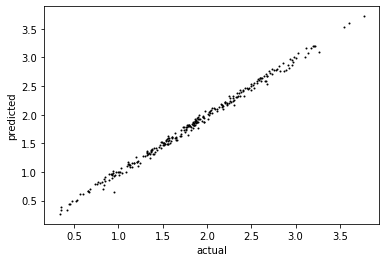

In [19]:
print("Training complete \n")
torch.save(net.state_dict(), os.path.abspath('')+ "\\testmodel")
test_x = normalise(test_x)
X = torch.Tensor(test_x)
y = net(X)
y = y.detach().numpy()
plot(test_y,y)